In [12]:
# importing the libraries
import pandas as pd
import numpy as np
import pickle
import cv2
import random 
import os
import pathlib
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as keras

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
%cd /content/MyDrive/MyDrive/Dataset
data = pathlib.Path('/content/MyDrive/MyDrive/Dataset') 

/content/MyDrive/MyDrive/Dataset


##Load Dataset

In [4]:

class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                 

                train_folder_path = os.path.join(self.PATH, categories)                        
                class_index = self.CATEGORIES.index(categories)                                 

                for img in os.listdir(train_folder_path):                                       
                    new_path = os.path.join(train_folder_path, img)                             
                    try:        
                        image_data_temp = cv2.imread(new_path)                 \
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            for x in data:
                self.x_data.append(x[0])        
                self.y_data.append(x[1])        

            X_Data = np.asarray(self.x_data) / (255.0)      
            Y_Data = np.asarray(self.y_data)


            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        X_Data,Y_Data = self.Process_Image()

        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:

            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data
class MasterImage2(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  

                train_folder_path = os.path.join(self.PATH, categories)                         
                class_index = self.CATEGORIES.index(categories)                                

                for img in os.listdir(train_folder_path):                                      
                    new_path = os.path.join(train_folder_path, img)                            

                    try:       
                        image_data_temp = cv2.imread(new_path)                
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            
            for x in data:
                self.x_data.append(x[0])        
                self.y_data.append(x[1])       

            X_Data = np.asarray(self.x_data) / (255.0)     
            Y_Data = np.asarray(self.y_data)


            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """

        X_Data,Y_Data = self.Process_Image()

        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:

            X_Temp = open('X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data


In [5]:
a = MasterImage2(PATH = data, IMAGE_SIZE = 100)
images, labels = a.load_dataset()


Reading Dataset from PIckle Object


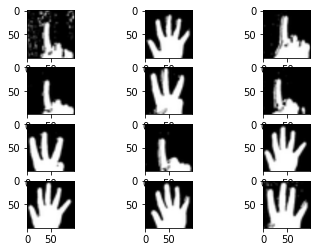

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=104, test_size=0.25, shuffle=True)

fig, ax = plt.subplots(4,3)
for i in range(4):
  for j in range(3):
    ax[i,j].imshow(X_train[3*i + j])

##Generator and Discriminator Model 

In [7]:
def generator_model():
  init = initializers.RandomNormal(stddev=0.05)
  generator = Sequential()
  generator.add(Dense(25*25*64, input_shape=(100,)))
  generator.add(Reshape((25, 25, 64)))
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', activation='relu'))
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh'))
  return generator

"""## define discriminator for model"""

def discriminator_model(shape):
  init = initializers.RandomNormal(stddev=0.05)
  discriminator = Sequential()
  discriminator.add(Conv2D(32, kernel_size=5, strides=2, padding='same',input_shape=(100,100,3)))
  discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(512, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation='sigmoid'))
  return discriminator


In [8]:

input_shape = (100, 100, 3)

Y_train = np_utils.to_categorical(y_train, len(np.unique(y_train)))
Y_test = np_utils.to_categorical(y_test, len(np.unique(y_train)))


X_train2 = np.float32(X_train)
X_train2 = (X_train2 * 2) -1
X_train2 = np.clip(X_train2, -1, 1)

X_test2 = np.float32(X_test)
X_test2 = (X_test2 * 2) -1
X_test2 = np.clip(X_test2, -1, 1)


##Compile Model

In [9]:
generator = generator_model()
discriminator = discriminator_model(X_train2[0].shape)
print('\n')
print('generator summary: \n')
generator.summary()
discriminator.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

"""## Discriminator model visualization"""
print('\n')
print('discriminator summary: \n')
discriminator.summary()

"""## compile model"""

discriminator.trainable = False
z = Input(shape=(100,))
generated_image = generator(z)
print(generated_image.shape)
label = discriminator(generated_image)
GAN = Model(inputs=z, outputs=label)
GAN.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])




generator summary: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40000)             4040000   
                                                                 
 reshape (Reshape)           (None, 25, 25, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 50, 32)       51232     
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                 

##Fit the Model

epoch = 1/350, d_loss=2.910, g_loss=0.603                                                                                                     
1/1 [==============================] - 0s 113ms/step


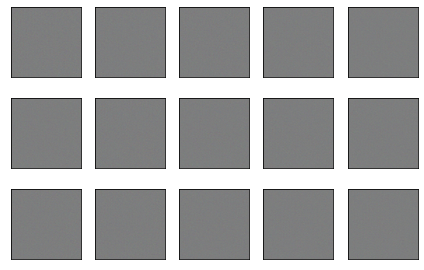

epoch = 2/350, d_loss=0.637, g_loss=0.146                                                                                                     
epoch = 3/350, d_loss=0.254, g_loss=0.107                                                                                                     
epoch = 4/350, d_loss=0.236, g_loss=0.009                                                                                                     
epoch = 5/350, d_loss=0.216, g_loss=0.006                                                                                                     
epoch = 6/350, d_loss=0.213, g_loss=0.004                                                                                                     
epoch = 7/350, d_loss=0.213, g_loss=0.003                                                                                                     
epoch = 8/350, d_loss=0.212, g_loss=0.003                                                                                                     

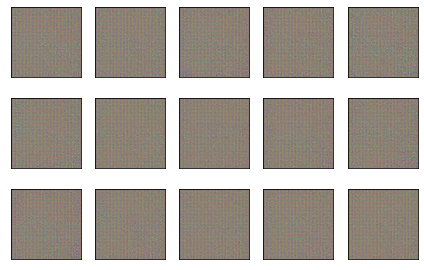

epoch = 17/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 18/350, d_loss=0.212, g_loss=0.004                                                                                                     
epoch = 19/350, d_loss=0.212, g_loss=0.004                                                                                                     
epoch = 20/350, d_loss=0.212, g_loss=0.004                                                                                                     
epoch = 21/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 22/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 23/350, d_loss=0.212, g_loss=0.004                                                                                              

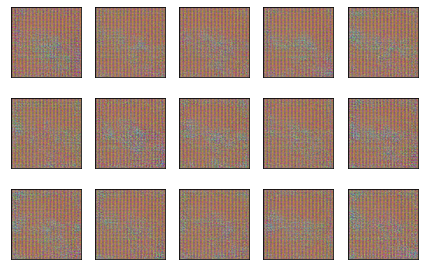

epoch = 32/350, d_loss=0.212, g_loss=0.004                                                                                                     
epoch = 33/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 34/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 35/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 36/350, d_loss=0.212, g_loss=0.005                                                                                                     
epoch = 37/350, d_loss=0.212, g_loss=0.007                                                                                                     
epoch = 38/350, d_loss=0.212, g_loss=0.006                                                                                              

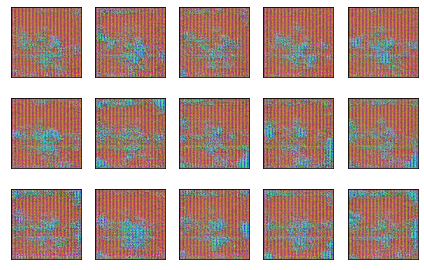

epoch = 47/350, d_loss=0.212, g_loss=0.008                                                                                                     
epoch = 48/350, d_loss=0.213, g_loss=0.008                                                                                                     
epoch = 49/350, d_loss=0.213, g_loss=0.010                                                                                                     
epoch = 50/350, d_loss=0.213, g_loss=0.010                                                                                                     
epoch = 51/350, d_loss=0.212, g_loss=0.011                                                                                                     
epoch = 52/350, d_loss=0.216, g_loss=0.015                                                                                                     
epoch = 53/350, d_loss=0.212, g_loss=0.013                                                                                              

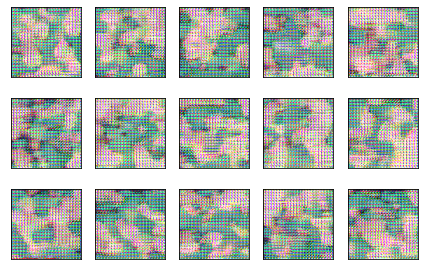

epoch = 62/350, d_loss=0.217, g_loss=0.114                                                                                                     
epoch = 63/350, d_loss=0.216, g_loss=0.093                                                                                                     
epoch = 64/350, d_loss=0.216, g_loss=0.080                                                                                                     
epoch = 65/350, d_loss=0.215, g_loss=0.077                                                                                                     
epoch = 66/350, d_loss=0.215, g_loss=0.064                                                                                                     
epoch = 67/350, d_loss=0.215, g_loss=0.054                                                                                                     
epoch = 68/350, d_loss=0.215, g_loss=0.065                                                                                              

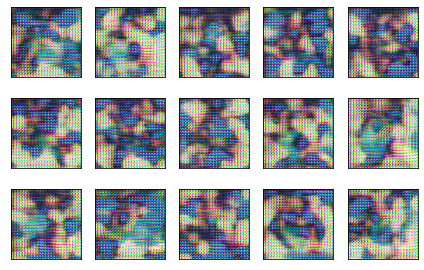

epoch = 77/350, d_loss=0.214, g_loss=0.141                                                                                                     
epoch = 78/350, d_loss=0.213, g_loss=0.185                                                                                                     
epoch = 79/350, d_loss=0.214, g_loss=0.186                                                                                                     
epoch = 80/350, d_loss=0.213, g_loss=0.232                                                                                                     
epoch = 81/350, d_loss=0.212, g_loss=0.224                                                                                                     
epoch = 82/350, d_loss=0.212, g_loss=0.214                                                                                                     
epoch = 83/350, d_loss=0.213, g_loss=0.205                                                                                              

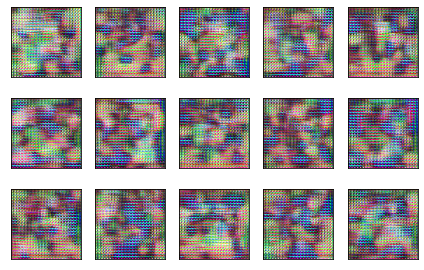

epoch = 92/350, d_loss=0.215, g_loss=0.247                                                                                                     
epoch = 93/350, d_loss=0.214, g_loss=0.251                                                                                                     
epoch = 94/350, d_loss=0.215, g_loss=0.235                                                                                                     
epoch = 95/350, d_loss=0.214, g_loss=0.371                                                                                                     
epoch = 96/350, d_loss=0.214, g_loss=0.559                                                                                                     
epoch = 97/350, d_loss=0.214, g_loss=0.627                                                                                                     
epoch = 98/350, d_loss=0.213, g_loss=1.006                                                                                              

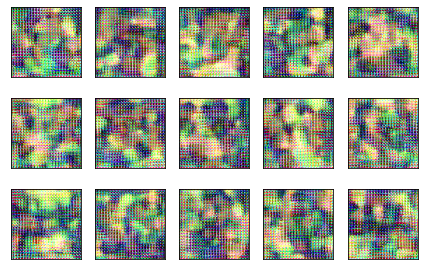

epoch = 107/350, d_loss=0.259, g_loss=8.395                                                                                                     
epoch = 108/350, d_loss=0.234, g_loss=5.222                                                                                                     
epoch = 109/350, d_loss=0.233, g_loss=3.896                                                                                                     
epoch = 110/350, d_loss=0.217, g_loss=3.713                                                                                                     
epoch = 111/350, d_loss=0.222, g_loss=2.706                                                                                                     
epoch = 112/350, d_loss=0.217, g_loss=2.740                                                                                                     
epoch = 113/350, d_loss=0.219, g_loss=2.798                                                                                       

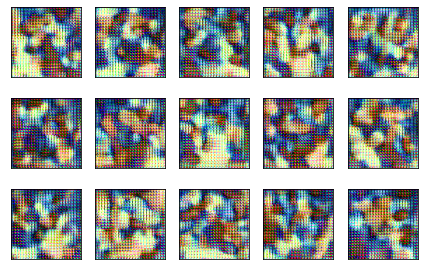

epoch = 122/350, d_loss=0.484, g_loss=17.854                                                                                                     
epoch = 123/350, d_loss=0.258, g_loss=13.520                                                                                                     
epoch = 124/350, d_loss=0.255, g_loss=2.387                                                                                                     
epoch = 125/350, d_loss=0.219, g_loss=2.123                                                                                                     
epoch = 126/350, d_loss=0.215, g_loss=1.698                                                                                                     
epoch = 127/350, d_loss=0.218, g_loss=1.279                                                                                                     
epoch = 128/350, d_loss=0.216, g_loss=1.109                                                                                     

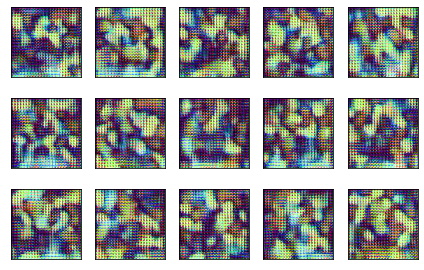

epoch = 137/350, d_loss=0.213, g_loss=1.020                                                                                                     
epoch = 138/350, d_loss=0.213, g_loss=1.013                                                                                                     
epoch = 139/350, d_loss=0.213, g_loss=1.073                                                                                                     
epoch = 140/350, d_loss=0.213, g_loss=1.187                                                                                                     
epoch = 141/350, d_loss=0.213, g_loss=1.169                                                                                                     
epoch = 142/350, d_loss=0.213, g_loss=1.204                                                                                                     
epoch = 143/350, d_loss=0.212, g_loss=1.216                                                                                       

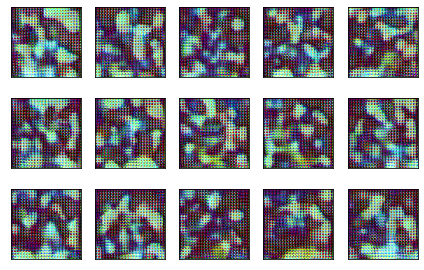

epoch = 152/350, d_loss=0.213, g_loss=1.510                                                                                                     
epoch = 153/350, d_loss=0.213, g_loss=1.555                                                                                                     
epoch = 154/350, d_loss=0.213, g_loss=1.504                                                                                                     
epoch = 155/350, d_loss=0.213, g_loss=1.536                                                                                                     
epoch = 156/350, d_loss=0.213, g_loss=1.492                                                                                                     
epoch = 157/350, d_loss=0.214, g_loss=1.366                                                                                                     
epoch = 158/350, d_loss=0.212, g_loss=1.386                                                                                       

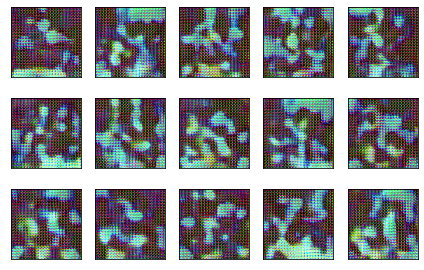

epoch = 167/350, d_loss=0.212, g_loss=1.015                                                                                                     
epoch = 168/350, d_loss=0.212, g_loss=0.923                                                                                                     
epoch = 169/350, d_loss=0.213, g_loss=0.851                                                                                                     
epoch = 170/350, d_loss=0.212, g_loss=0.766                                                                                                     
epoch = 171/350, d_loss=0.213, g_loss=0.640                                                                                                     
epoch = 172/350, d_loss=0.213, g_loss=0.829                                                                                                     
epoch = 173/350, d_loss=0.237, g_loss=0.901                                                                                       

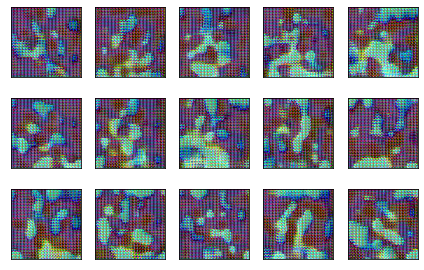

epoch = 182/350, d_loss=0.212, g_loss=0.177                                                                                                     
epoch = 183/350, d_loss=0.212, g_loss=0.166                                                                                                     
epoch = 184/350, d_loss=0.212, g_loss=0.160                                                                                                     
epoch = 185/350, d_loss=0.212, g_loss=0.166                                                                                                     
epoch = 186/350, d_loss=0.212, g_loss=0.170                                                                                                     
epoch = 187/350, d_loss=0.212, g_loss=0.152                                                                                                     
epoch = 188/350, d_loss=0.212, g_loss=0.165                                                                                       

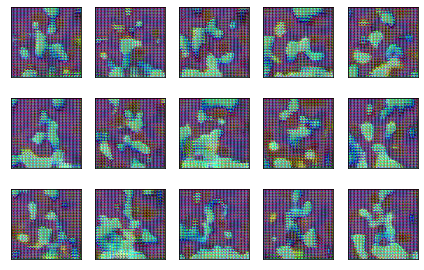

epoch = 197/350, d_loss=0.213, g_loss=0.132                                                                                                     
epoch = 198/350, d_loss=0.213, g_loss=0.133                                                                                                     
epoch = 199/350, d_loss=0.213, g_loss=0.118                                                                                                     
epoch = 200/350, d_loss=0.213, g_loss=0.133                                                                                                     
epoch = 201/350, d_loss=0.215, g_loss=0.123                                                                                                     
epoch = 202/350, d_loss=0.218, g_loss=0.104                                                                                                     
epoch = 203/350, d_loss=0.265, g_loss=0.068                                                                                       

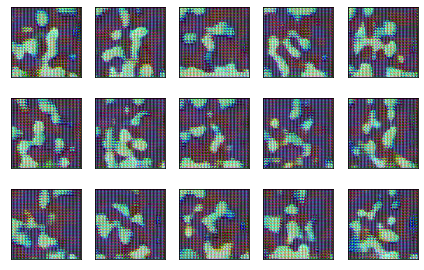

epoch = 212/350, d_loss=0.220, g_loss=0.519                                                                                                     
epoch = 213/350, d_loss=0.219, g_loss=0.530                                                                                                     
epoch = 214/350, d_loss=0.217, g_loss=0.540                                                                                                     
epoch = 215/350, d_loss=0.216, g_loss=0.555                                                                                                     
epoch = 216/350, d_loss=0.215, g_loss=0.579                                                                                                     
epoch = 217/350, d_loss=0.215, g_loss=0.572                                                                                                     
epoch = 218/350, d_loss=0.214, g_loss=0.595                                                                                       

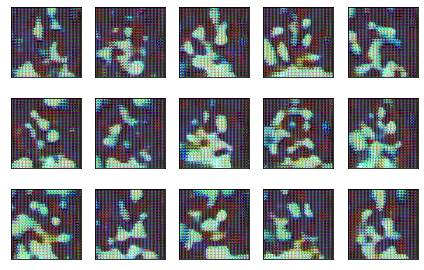

epoch = 227/350, d_loss=0.212, g_loss=0.544                                                                                                     
epoch = 228/350, d_loss=0.212, g_loss=0.538                                                                                                     
epoch = 229/350, d_loss=0.212, g_loss=0.538                                                                                                     
epoch = 230/350, d_loss=0.212, g_loss=0.522                                                                                                     
epoch = 231/350, d_loss=0.212, g_loss=0.516                                                                                                     
epoch = 232/350, d_loss=0.212, g_loss=0.511                                                                                                     
epoch = 233/350, d_loss=0.212, g_loss=0.515                                                                                       

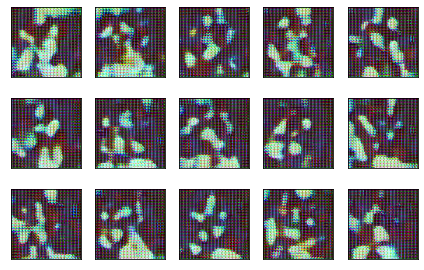

epoch = 242/350, d_loss=0.212, g_loss=0.455                                                                                                     
epoch = 243/350, d_loss=0.212, g_loss=0.461                                                                                                     
epoch = 244/350, d_loss=0.212, g_loss=0.447                                                                                                     
epoch = 245/350, d_loss=0.212, g_loss=0.447                                                                                                     
epoch = 246/350, d_loss=0.212, g_loss=0.443                                                                                                     
epoch = 247/350, d_loss=0.212, g_loss=0.437                                                                                                     
epoch = 248/350, d_loss=0.212, g_loss=0.424                                                                                       

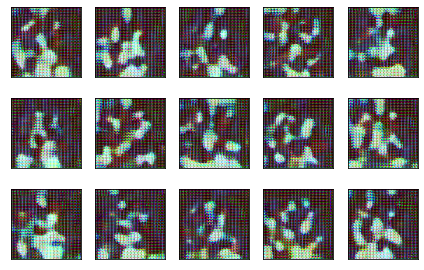

epoch = 257/350, d_loss=0.212, g_loss=0.370                                                                                                     
epoch = 258/350, d_loss=0.212, g_loss=0.356                                                                                                     
epoch = 259/350, d_loss=0.212, g_loss=0.367                                                                                                     
epoch = 260/350, d_loss=0.212, g_loss=0.357                                                                                                     
epoch = 261/350, d_loss=0.212, g_loss=0.339                                                                                                     
epoch = 262/350, d_loss=0.212, g_loss=0.352                                                                                                     
epoch = 263/350, d_loss=0.212, g_loss=0.337                                                                                       

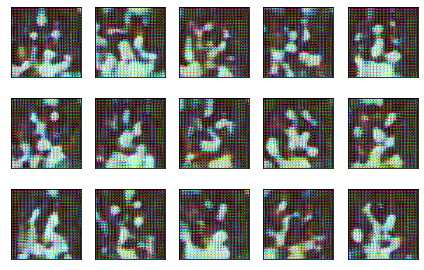

epoch = 272/350, d_loss=0.212, g_loss=0.286                                                                                                     
epoch = 273/350, d_loss=0.212, g_loss=0.280                                                                                                     
epoch = 274/350, d_loss=0.212, g_loss=0.275                                                                                                     
epoch = 275/350, d_loss=0.212, g_loss=0.273                                                                                                     
epoch = 276/350, d_loss=0.212, g_loss=0.266                                                                                                     
epoch = 277/350, d_loss=0.212, g_loss=0.266                                                                                                     
epoch = 278/350, d_loss=0.212, g_loss=0.261                                                                                       

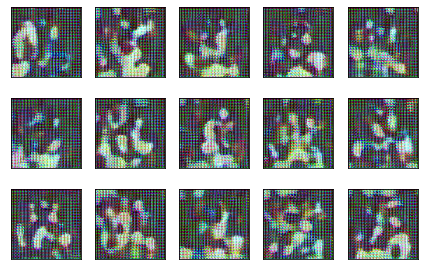

epoch = 287/350, d_loss=0.396, g_loss=6.162                                                                                                     
epoch = 288/350, d_loss=0.330, g_loss=3.057                                                                                                     
epoch = 289/350, d_loss=0.267, g_loss=1.684                                                                                                     
epoch = 290/350, d_loss=0.226, g_loss=1.378                                                                                                     
epoch = 291/350, d_loss=0.215, g_loss=1.324                                                                                                     
epoch = 292/350, d_loss=0.216, g_loss=1.222                                                                                                     
epoch = 293/350, d_loss=0.215, g_loss=1.546                                                                                       

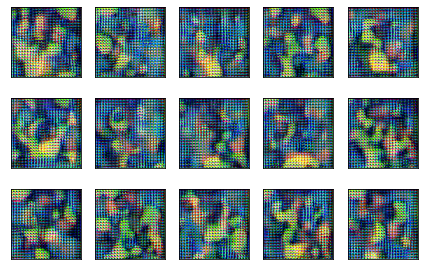

epoch = 302/350, d_loss=0.316, g_loss=4.013                                                                                                     
epoch = 303/350, d_loss=0.237, g_loss=2.447                                                                                                     
epoch = 304/350, d_loss=0.247, g_loss=2.546                                                                                                     
epoch = 305/350, d_loss=0.220, g_loss=2.662                                                                                                     
epoch = 306/350, d_loss=0.232, g_loss=2.382                                                                                                     
epoch = 307/350, d_loss=0.217, g_loss=2.291                                                                                                     
epoch = 308/350, d_loss=0.213, g_loss=2.290                                                                                       

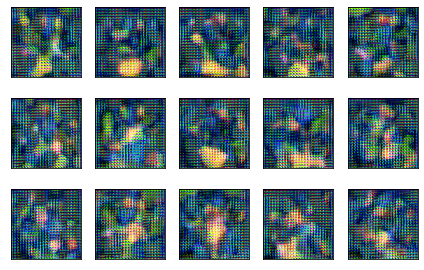

epoch = 317/350, d_loss=0.212, g_loss=1.801                                                                                                     
epoch = 318/350, d_loss=0.212, g_loss=1.483                                                                                                     
epoch = 319/350, d_loss=0.212, g_loss=1.545                                                                                                     
epoch = 320/350, d_loss=0.212, g_loss=1.618                                                                                                     
epoch = 321/350, d_loss=0.212, g_loss=1.572                                                                                                     
epoch = 322/350, d_loss=0.212, g_loss=1.610                                                                                                     
epoch = 323/350, d_loss=0.213, g_loss=1.524                                                                                       

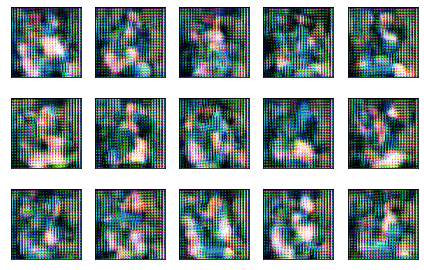

epoch = 332/350, d_loss=0.213, g_loss=1.941                                                                                                     
epoch = 333/350, d_loss=0.213, g_loss=2.102                                                                                                     
epoch = 334/350, d_loss=0.219, g_loss=2.023                                                                                                     
epoch = 335/350, d_loss=0.219, g_loss=2.688                                                                                                     
epoch = 336/350, d_loss=0.212, g_loss=3.988                                                                                                     
epoch = 337/350, d_loss=0.270, g_loss=2.211                                                                                                     
epoch = 338/350, d_loss=0.446, g_loss=9.003                                                                                       

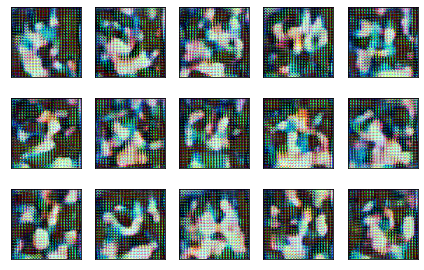

epoch = 347/350, d_loss=0.221, g_loss=2.018                                                                                                     
epoch = 348/350, d_loss=0.222, g_loss=2.091                                                                                                     
epoch = 349/350, d_loss=0.218, g_loss=1.999                                                                                                     
epoch = 350/350, d_loss=0.217, g_loss=2.032                                                                                                     
epoch = 351/350, d_loss=0.219, g_loss=2.383                                                                                                     


In [10]:
epochs = 350
batch_size = 100
smooth = 0.15

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train2) // batch_size):
        

        discriminator.trainable = True
        X_batch = X_train2[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        g_loss_batch = GAN.train_on_batch(x=z, y=real)

        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train2) // batch_size, d_loss_batch, g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], g_loss[-1]), 100*' ')

    if e % 15 == 0:
        samples = 15
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(3, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1)* 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()


##Plot Model Loss

<ipython-input-13-b46560a2e794>:7: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Discriminator', 'Generator'], loc='up right')


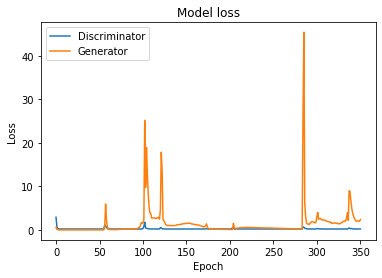

In [13]:

# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Generator'], loc='up right')
plt.show()